In [11]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Mount Google drive to access the dataset (monkeys_dataset.zip)
import zipfile
import csv
import pickle

In [25]:
path = "images/Training/female"
file_names = []
# iterate through the names of contents of the folder
for image_path in os.listdir(path):
    input_path = os.path.join(path, image_path)
    file_names.append(input_path)
path = "images/Training/male"
# iterate through the names of contents of the folder
for image_path in os.listdir(path):
    input_path = os.path.join(path, image_path)
    file_names.append(input_path)
female_only = file_names[:5000]
male_only = file_names[-5000:]
file_names = male_only + female_only
print(len(file_names))


10000


In [26]:
labels = []
for x in range(5000):
    labels.append("female")
for x in range(5000):
    labels.append("male")


In [28]:
images = []
for x in file_names:
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)


In [29]:
output = open('images.pkl', 'wb')
pickle.dump(images, output)
output.close()

In [30]:
images = np.array(images)

In [78]:
def scale_resize_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (128, 128)) # Resizing the image to 224x224 dimention
    return image
resized_images = []
for x in images:
    x=scale_resize_image(x)
    resized_images.append(x)


In [79]:
resized_images = np.array(resized_images)

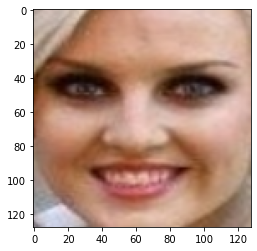

In [80]:
plt.imshow(resized_images[8500])

In [81]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(resized_images, labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.3, random_state=42,stratify=y_temp)

In [82]:
X_train, X_test, y_train, y_test, X_val, y_val = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test), np.array(X_val), np.array(y_val)

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(6300, 128, 128, 3) (6300,)
(2700, 128, 128, 3) (2700,)
(1000, 128, 128, 3) (1000,)


In [83]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [84]:
X_train_normalized = X_train
X_val_normalized = X_val
X_test_normalized = X_test

In [85]:
# Intializing a sequential model
model = Sequential()

model.add(Conv2D(48, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))


opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 48)      1344      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 32)        13856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_15 (Dense)            (None, 32)               

In [86]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=5,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=2,
            verbose=1
)

Epoch 1/5
3150/3150 [==============================] - 100s 32ms/step - loss: 0.5994 - accuracy: 0.6756 - val_loss: 0.4015 - val_accuracy: 0.8130
Epoch 2/5
3150/3150 [==============================] - 104s 33ms/step - loss: 0.3724 - accuracy: 0.8506 - val_loss: 0.3639 - val_accuracy: 0.8530
Epoch 3/5
3150/3150 [==============================] - 105s 33ms/step - loss: 0.2935 - accuracy: 0.8844 - val_loss: 0.2631 - val_accuracy: 0.9037
Epoch 4/5
3150/3150 [==============================] - 111s 35ms/step - loss: 0.2488 - accuracy: 0.9075 - val_loss: 0.2625 - val_accuracy: 0.8993
Epoch 5/5
3150/3150 [==============================] - 110s 35ms/step - loss: 0.2186 - accuracy: 0.9127 - val_loss: 0.2897 - val_accuracy: 0.8989


[0.2965275049209595, 0.8889999985694885]


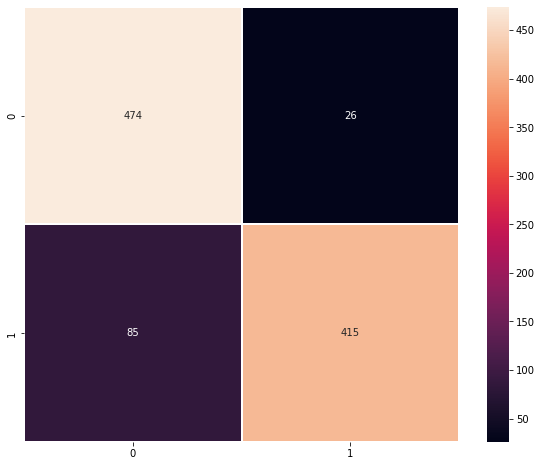

In [88]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=0)
y_pred=model.predict(X_test_normalized)
print(accuracy)
prediction = []
for x in y_pred:
    if x > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_encoded,prediction)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [89]:
import pickle
save_path = './GENDER TESTING/model.h5'
model.save(save_path)

In [90]:
path = "images/Validation/female"
file_names = []
# iterate through the names of contents of the folder
for image_path in os.listdir(path):
    input_path = os.path.join(path, image_path)
    file_names.append(input_path)
print(len(file_names))
path = "images/Validation/male"
# iterate through the names of contents of the folder
for image_path in os.listdir(path):
    input_path = os.path.join(path, image_path)
    file_names.append(input_path)

print(len(file_names))


5841
11649


In [91]:
images = []
for x in file_names:
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)


In [100]:
labels = []
for x in range(5841):
    labels.append("male")
for x in range(11649-5841):
    labels.append("female")


In [101]:
new_labels = enc.transform(labels)

In [97]:
def scale_resize_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (128, 128)) # Resizing the image to 224x224 dimention
    return image
resized_images = []
for x in images:
    x=scale_resize_image(x)
    resized_images.append(x)
resized_images = np.array(resized_images)

365/365 [==============================] - 56s 152ms/step - loss: 0.2688 - accuracy: 0.9023
[0.26877743005752563, 0.902309238910675]


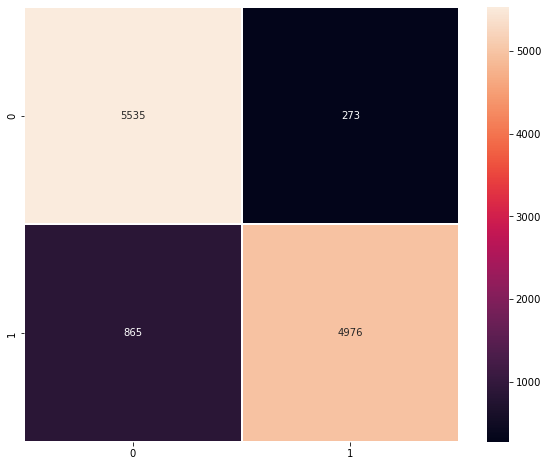

In [102]:
accuracy = model.evaluate(resized_images, new_labels, verbose=1)
y_pred=model.predict(resized_images)
print(accuracy)
prediction = []
for x in y_pred:
    if x > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(new_labels,prediction)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()